In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

data_path = os.getcwd() + '/dados' # precisa limpar o cabecalho desses arquivos

from ES3 import * 
os.listdir(data_path)[1]

'SIMCOSTA_RJ-2_OCEAN_2015-07-29_2016-12-20.csv'

In [2]:
dado = trata_dado(data_path + '/' + os.listdir(data_path)[1])

In [3]:
teste_serie_temporal(dado)

Foram encontradas 22837 falhas na serie temporal.


[]

In [4]:
evento_extremo(dado)

In [5]:
aproveitamento(dado, 'Hsig')

De 22831 valores, 134 foram marcados com a flag de pulo (0.59%).
1 valores foram marcados com a flag de crise (0.0%).


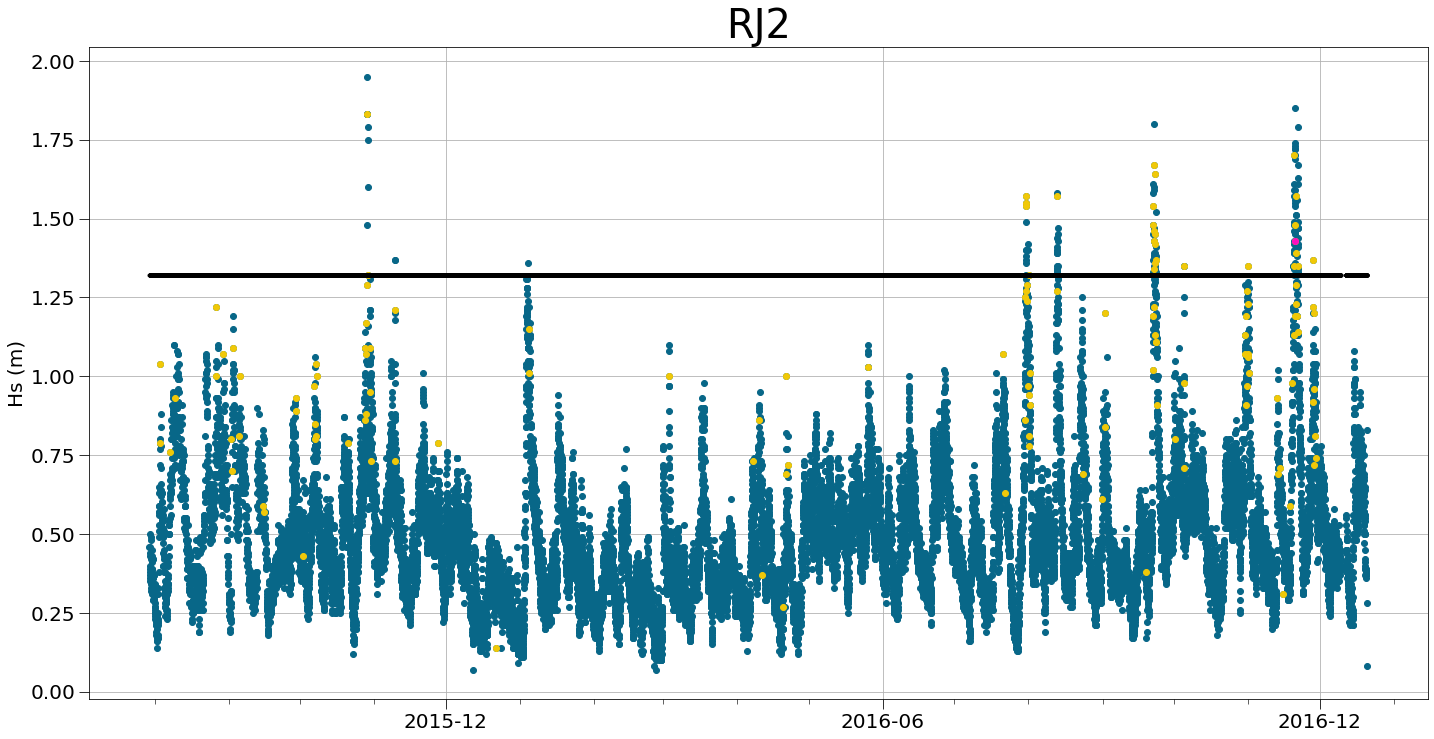

In [6]:
import matplotlib.dates as mdates

fig = plt.figure(figsize=(24,12))

ax = fig.add_subplot(111)
ax.plot(dado['Hsig'][:], marker = 'o', color = '#086788', linestyle = 'none')
ax.plot(dado['jump_flag'][:], marker = 'o', color = '#F0C808', linestyle = 'none')
ax.plot(dado['jump_crisis'][:], marker = 'o', color = '#FC0FC0', linestyle = 'none')
# ax.plot(serie4['Hsig'][:], marker = 'o', color = 'purple', linestyle = 'none')


ax.plot(dado['EE_Hsig'][:], marker = '.', color = 'black', linestyle = 'none')
#ax.plot(dado['jump_flag'][:], marker = 'o', color = 'yellow', linestyle = 'none')
#ax.plot(dado['jump_crisis'][:], marker = 'o', color = 'red', linestyle = 'none')

#plt.axhline(y=2.980402, color='blue', linestyle='-') # limite de evento extremo

ax.grid()
ax.set_ylabel('Hs (m)', fontsize = 20)

################################# data #######################

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


ax.tick_params(axis='both', which='major', labelsize=20, size=10)
ax.tick_params(axis='both', which='minor', size=5)

# ax.set_ylim(0,5)
# ax.set_xlim(datetime(2016,5,1), datetime(2021,10,1))



###########################################################################

plt.title('RJ2', fontsize = 40)

plt.savefig(os.getcwd() +'/fig/RJ2')

In [7]:
from windrose import WindroseAxes
dado_limpo = dado[dado['jump_flag'].isnull()]

ws = dado_limpo['Hsig']
wd = dado_limpo['Avg_Wv_Dir_N']

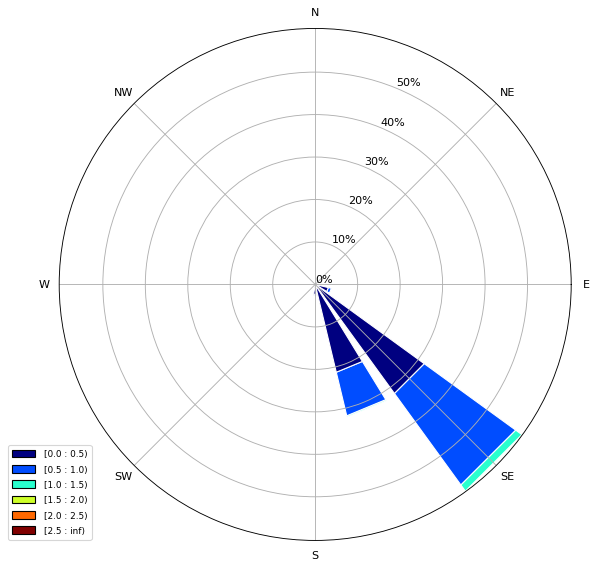

In [8]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,3,0.5))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
ax.set_legend(loc =(-0.1,0))

plt.savefig(os.getcwd() +'/fig/RJ2_rosaHs')

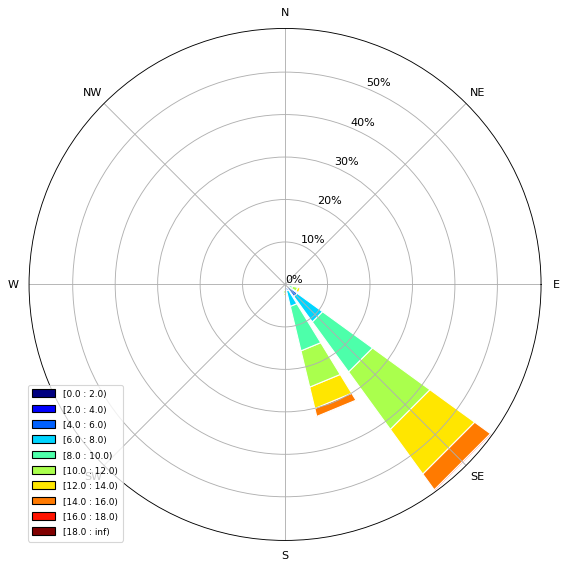

In [9]:
ws = dado_limpo['TP']


ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
# ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', bins = np.arange(0,20,2))
ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])

ax.set_yticks(np.arange(0, 60, step=10))
y_ticks = []
y_ticks_aux = np.arange(0, 60, step=10)
for j in (y_ticks_aux):
    y_ticks.append(str(j) + '%')
ax.set_yticklabels(y_ticks)
    
    
    
ax.set_legend()

plt.savefig(os.getcwd() +'/fig/RJ2_rosaTp')